Recently, someone has broken into my friend's house and has stolen almost all of her valuables. Now, she is looking for a new a place, since she does not feel safe in her neighbourhood anymore. However, the problem is that my friend does not really know which neighbourhoods could be considered safe in Toronto, particularly in downtown. I decided to help her by creating a map of Break and Enter crime, which is classified as one of the Major Crime Indicators(MCI), specifically at apartments in the downtown of Toronto. In addition, I will be using one of the most popular unsupervised learning algorithms - clustering with K-Means. However, the main focus of this project is to display the centroids of the clusters, rather than examining the clusters themselves. The data used for this project is available [here](http://data.torontopolice.on.ca/datasets/mci-2014-to-2017?geometry=-80.064%2C43.544%2C-78.663%2C43.891).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
crime_data = pd.read_csv('MCI_2014_to_2017.csv', delimiter=",", header=0)

### Data Wrangling

First, let's have a look at the first five rows of the data and then at the feature names and their value types.

In [3]:
crime_data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
0,-79.520401,43.768829,14601,GO-20142775022,2014-08-25T04:00:00.000Z,2014-08-25T04:00:00.000Z,Outside,1430,100,Assault,...,237.0,Monday,18,Assault,D31,24,Black Creek (24),43.768829,-79.520401,14001
1,-79.580856,43.642574,14602,GO-20142870874,2014-08-25T04:00:00.000Z,2014-09-08T04:00:00.000Z,House,2120,220,B&E W'Intent,...,237.0,Monday,9,Break and Enter,D22,11,Eringate-Centennial-West Deane (11),43.642574,-79.580856,14002
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
4,-79.231758,43.776440,14605,GO-20142778699,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Other,2120,200,B&E,...,237.0,Monday,16,Break and Enter,D43,137,Woburn (137),43.776440,-79.231758,14005


In [4]:
crime_data.dtypes

X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
occurrencedate          object
reporteddate            object
premisetype             object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Division                object
Hood_ID                  int64
Neighbourhood           object
Lat                    float64
Long                   float64
FID                      int64
dtype: object

It seems that the pair of X and Y columns have the same values as Long and Lat columns. We can can slice the dataset and call first five rows to see if there are any rows where the values are not the same.

In [5]:
crime_data[crime_data.X != crime_data.Long].head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
7,-79.382530,43.705540,14608,GO-20142779486,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,House,2120,200,B&E,...,237.0,Monday,21,Break and Enter,D53,99,Mount Pleasant East (99),43.705540,-79.382530,14008
9,-79.344650,43.764641,14610,GO-20142910587,2014-09-14T04:00:00.000Z,2014-09-14T04:00:00.000Z,Apartment,1430,100,Assault,...,257.0,Sunday,20,Assault,D33,45,Parkwoods-Donalda (45),43.764641,-79.344650,14010
17,-79.252052,43.735851,14618,GO-20142941988,2014-09-16T04:00:00.000Z,2014-09-19T04:00:00.000Z,Commercial,1430,100,Assault,...,259.0,Tuesday,2,Assault,D41,138,Eglinton East (138),43.735851,-79.252052,14018


In [6]:
print(crime_data.X[2])
print(crime_data.Long[2])

-79.26044460000001
-79.2604446


In general, the values are the same, so I will use the pair of Long and Lat columns. This means that I have to drop X and Y columns. In addition, I will drop some index columns which are not statistically meaningful and _Neighbourhood_ column, because we have *Hood_ID*, which is basically the same feature.

In [7]:
crime_data.drop(['X', 'Y', 'Index_', 'event_unique_id','ucr_code','ucr_ext','FID', 
                 'Neighbourhood'], axis=1, inplace=True)

Now, let's change the type of _occurrencedate_ and _reporteddate_ features. The cell itself is consisting of the date and time, but I only need the date, because we have two other features such as _occurrencehour_ and _reportedhour_, which I believe are more descriptive.

In [8]:
occurrencedate_list = crime_data.occurrencedate.str.split('T').tolist()
reporteddate_list = crime_data.reporteddate.str.split('T').tolist()

for i in range(len(occurrencedate_list)):
    occurrencedate_list[i] = occurrencedate_list[i][0]

for i in range(len(reporteddate_list)):
    reporteddate_list[i] = reporteddate_list[i][0]
    
crime_data['occurrencedate'] = occurrencedate_list
crime_data['reporteddate'] = reporteddate_list

crime_data.occurrencedate = pd.to_datetime(crime_data.occurrencedate)
crime_data.reporteddate = pd.to_datetime(crime_data.reporteddate)

There are still some useless columns left, so let's drop them.

In [9]:
crime_data.drop(['reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear', 
                'occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear'],
                axis=1, inplace=True)

Finally, let's transform string variables into categorical.

In [10]:
crime_data.premisetype = crime_data.premisetype.astype('category', errors='raise')
crime_data.offence = crime_data.offence.astype('category', errors='raise')
crime_data.MCI = crime_data.MCI.astype('category', errors='raise')
crime_data.reporteddayofweek = crime_data.reporteddayofweek.astype('category', errors='raise')
# there are whitespaces in the days of week, which should be removed before transformation
crime_data.occurrencedayofweek = crime_data.occurrencedayofweek.str.rstrip().astype('category', errors='raise')
crime_data.Division = crime_data.Division.astype('category', errors='raise')

As a result, the dataset is now ready for the analysis.

### K-Means Clustering

To begin, I will define the function which will return the scatter plot with cluster centroids on it.

In [11]:
def doKMeans(data, n_clusters):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data.Long, data.Lat, marker='.', c='blue', alpha=0.2)
    
    data = data.loc[:, ['Long', 'Lat']]
    
    model = KMeans(n_clusters=n_clusters)
    model.fit(data)
    
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.8, linewidths=3, s=169)
    plt.show()

Now let's create a slice of the data with only Break and Enter crimes, which occurred at apartments.

In [12]:
break_enter_ap = crime_data[(crime_data.MCI == 'Break and Enter')
                           & (crime_data.premisetype == 'Apartment')]
break_enter_ap.reset_index(inplace=True, drop=True)

Finally, let's call the function with our sliced data and with 3 clusters.

[[-79.50608718  43.70331137]
 [-79.2815728   43.74187513]
 [-79.39405628  43.67155631]]


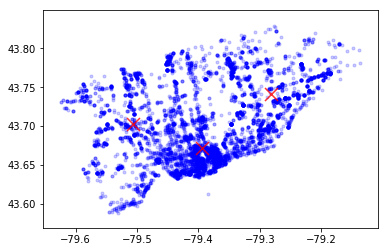

In [13]:
doKMeans(break_enter_ap, 3)

I chose 3 as a number of clusters because I wanted to see the overall number of break-ins in Toronto, while keeping in mind that the largest amount of apartments is located in Downtown of Toronto, whereas other municipalities within Toronto have less apartments, but bigger number of houses. Hence, it was not a surprise that the highest density of Break and Enter crimes is in Downtown, while two other centroids are located in York and Scarborough with more spread out observations.

Nevertheless, I am mostly interested in the Downtown cluster so I want to 'zoom-in' the scatter plot and divide it into clusters itself.

In addition, there is an outlier, which should be removed. It is an obvious outlier because there are no apartments on Toronto Island. 

In [14]:
break_enter_ap[(break_enter_ap.Long > -79.4) & (break_enter_ap.Lat < 43.63)]
break_enter_ap.drop(71, axis=0, inplace=True)

/Users/apple/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[[-79.37393286  43.66167602]
 [-79.39746564  43.64845085]
 [-79.42072243  43.64769858]]


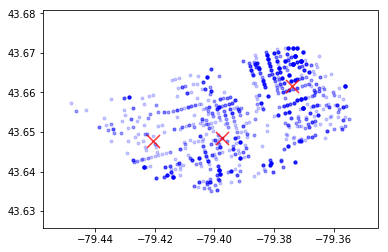

In [15]:
doKMeans(break_enter_ap[(break_enter_ap.Hood_ID > 70) & (break_enter_ap.Hood_ID < 85)], 3)

The right centroid is located between Yonge-Church corridor and Cabbage town. This centroid indicates the general location of right cluster, which has the biggest density of break-ins among 3 clusters. However, the centroid in the left illustrates the approximate location of left cluster with the lowest density of break-ins. It includes Little Portugal and Liberty village. The middle centroid is located in the heart of Chinatown and its cluster is more scattered than the cluster on the East of downtown, but more dense then the one on the West. Hence, according to the distance between the three centroids, the cluster on the right side is more isolated with the higher density of observations.

### Conclusion

In general, I would definetely advise my friend and those, who are looking for a new apartment, to avoid the northern part of Church-Yonge corridor and Cabbagetown, because of the high rate of Break and Enter crimes of those neighbourhoods. However, I would recommend to consider looking for an apartment in the East of downtown, particularly in Little Portugal or Liberty Village.